In [ ]:
import base64
from io import BytesIO

from diffusers import AutoPipelineForText2Image
import torch

device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
print(f"Using device: {device}")


pipeline = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16"
).to(device)

  0%|          | 0/4 [00:00<?, ?it/s]

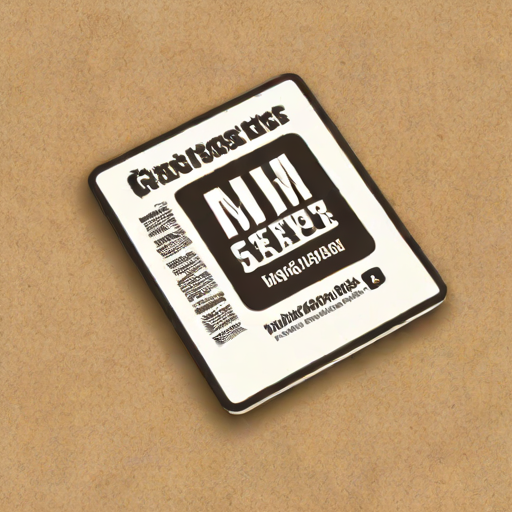

In [51]:
import matplotlib.pyplot as plt

prompt = "Logo for a newspaper app"

image = pipeline(
    prompt=prompt, guidance_scale=0.0, num_inference_steps=4, num_images_per_prompt=1
).images[0]

image

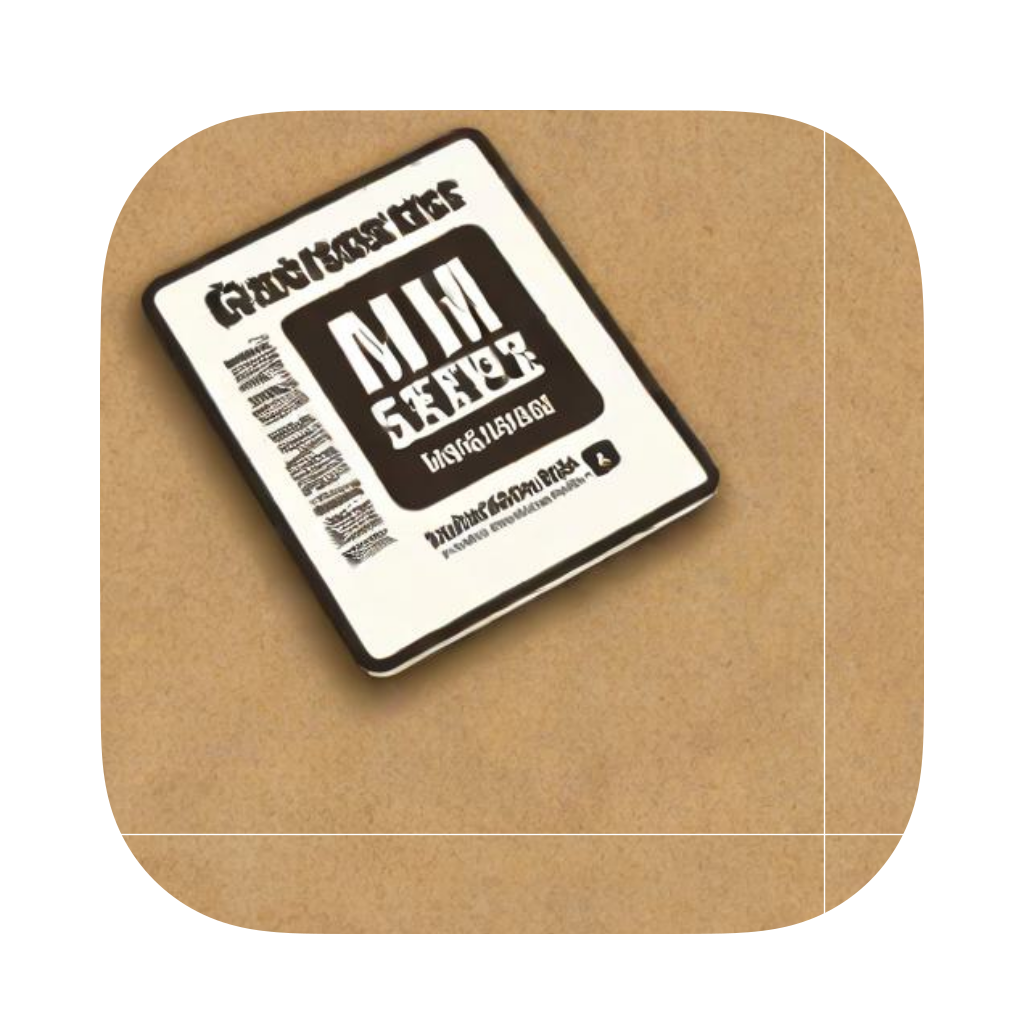

In [52]:
from IPython.display import SVG, display

buffered = BytesIO()
image.save(buffered, format="JPEG")
img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")

with open("template.svg", "r") as f:
    svg = f.read()

svg = svg.replace("__BASE64JPG__", img_str)

display(SVG(svg))

# Save svg
with open("output.svg", "w") as f:
    f.write(svg)

In [ ]:
# cairosvg.svg2png(bytestring=svg, write_to="output.png")